**Name : Atharv Harshal Kulkarni**

**Prn: 22070126022**

**Branch : Aiml A1**

**The dataset contains 10,000 images of aircraft, The data is split into 3334 training images, 3333 validation and 3333 testing images Aircraft models are organized in a four-levels hierarchy. The four levels, from finer to coarser, are:**

**Model, e.g. Boeing 737-76J. Since certain models are nearly visually indistinguishable, this level is not used in the evaluation. Variant, e.g. Boeing 737-700. A variant collapses all the models that are visually indistinguishable into one class. The dataset comprises 100 different variants.**

**Family, e.g. Boeing 737. The dataset comprises 70 different families. Manufacturer, e.g. Boeing. The dataset comprises 41 different manufacturers**

#DOWNLOADING THE DATASET

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("seryouxblaster764/fgvc-aircraft")

print("Path to dataset files:", path)

100%|██████████| 2.57G/2.57G [01:08<00:00, 39.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/seryouxblaster764/fgvc-aircraft/versions/2


#IMPORTIMG ALL THE NECESSARIES LIBRARIES

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#SETTING THE HYPERPARAMETERS

In [ ]:
image_size = 64
batch_size = 128
latent_dim = 100
lr = 0.0002
beta1 = 0.5
epochs = 25

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#LOADING THE DATASET

In [ ]:
dataset_path ="/root/.cache/kagglehub/datasets/seryouxblaster764/fgvc-aircraft/versions/2"

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#TRAINING THE GENERATOR

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Input: latent vector Z of shape (N, latent_dim, 1, 1)
            nn.ConvTranspose2d(latent_dim, 256, 4, 1, 0, bias=False),  # (N,256,4,4)
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),           # (N,128,8,8)
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),            # (N,64,16,16)
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),              # (N,3,32,32)
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

#TRAINING THE DISCRIMINATOR

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input: image of shape (N,3,32,32)
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),   # (N,64,16,16)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),  # (N,128,8,8)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False), # (N,256,4,4)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),   # (N,1,1,1)
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(x.size(0), 1)

#INITIALIZING THE MODEL

In [ ]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

#LOSS AND OPTIMIZERS

In [ ]:
criterion = nn.BCELoss()
optimizerG = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

#TRAINING THE LOOP AND FINAL OUTPUT

Epoch [1/25] | D Loss: 1.0808 | G Loss: 0.7496
Epoch [2/25] | D Loss: 1.0918 | G Loss: 0.7111
Epoch [3/25] | D Loss: 1.1000 | G Loss: 0.7991
Epoch [4/25] | D Loss: 1.1058 | G Loss: 0.6684
Epoch [5/25] | D Loss: 1.0184 | G Loss: 0.7321
Epoch [6/25] | D Loss: 1.1690 | G Loss: 0.6774
Epoch [7/25] | D Loss: 1.0113 | G Loss: 0.7619
Epoch [8/25] | D Loss: 1.0026 | G Loss: 0.7116
Epoch [9/25] | D Loss: 1.1911 | G Loss: 0.6490
Epoch [10/25] | D Loss: 1.0066 | G Loss: 0.7974
Epoch [11/25] | D Loss: 1.0356 | G Loss: 0.8581
Epoch [12/25] | D Loss: 1.1109 | G Loss: 0.7039
Epoch [13/25] | D Loss: 1.2577 | G Loss: 0.8464
Epoch [14/25] | D Loss: 1.1207 | G Loss: 0.6184
Epoch [15/25] | D Loss: 1.0924 | G Loss: 0.8455
Epoch [16/25] | D Loss: 1.1708 | G Loss: 0.6856
Epoch [17/25] | D Loss: 1.2409 | G Loss: 0.6054
Epoch [18/25] | D Loss: 1.2049 | G Loss: 0.5937
Epoch [19/25] | D Loss: 1.2303 | G Loss: 0.6044
Epoch [20/25] | D Loss: 1.0332 | G Loss: 0.7126
Epoch [21/25] | D Loss: 1.2215 | G Loss: 0.5748
E

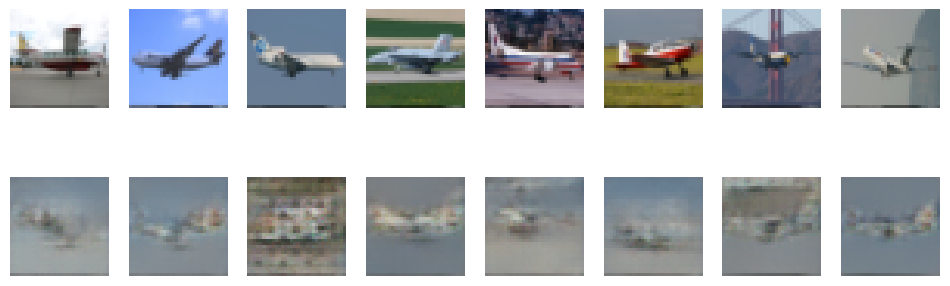

Training Complete!


In [ ]:
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_images = generator(noise)
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        optimizerD.zero_grad()
        real_loss = criterion(discriminator(real_images), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizerD.step()

        # Train Generator
        optimizerG.zero_grad()
        g_loss = criterion(discriminator(fake_images), real_labels)
        g_loss.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Display real vs generated images every 25 epochs
    if (epoch+1) % 25 == 0:
        with torch.no_grad():
            sample_noise = torch.randn(16, latent_dim, 1, 1, device=device)
            generated_images = generator(sample_noise).cpu()

        fig, axes = plt.subplots(2, 8, figsize=(12, 4))
        for j in range(8):
            axes[0, j].imshow((real_images[j].cpu().permute(1, 2, 0) * 0.5) + 0.5)
            axes[0, j].axis("off")
            axes[1, j].imshow((generated_images[j].cpu().permute(1, 2, 0) * 0.5) + 0.5)
            axes[1, j].axis("off")
        plt.show()

print("Training Complete!")